# Assumed Sensor Accuracies are Correct for All Robots

All 10 robots' initial estimate of the sensor accuracy is exactly the actual accuracy and run the sensor filter. In the following plots, the different color lines represent different trials.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import static_degradation_viz_module as sdvm

In [2]:
# Define colors for plots
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "dodgerblue", "mediumturquoise",]

# Define common plotting function
def plot_data(json_data_lst, tfr):

    # Display parameter values
    print("Common parameter values:\n")

    # Plot time series
    fig1, ax1 = plt.subplots(2, 3, figsize=(16, 10))
    for i, json_data_obj in enumerate(json_data_lst):
        json_data_obj.print_common_data()
        print("\n")

        # Plot correct target fill ratio value
        ax1[0, i].axhline(tfr, color="black", linestyle="--")

        # Plot correct sensor accuracy value
        ax1[1, i].axhline(json_data_obj.correct_sensor_acc_b, color="black", linestyle="--")

        for j, num in enumerate(sorted(json_data_obj.num_flawed_robots)):
            for trial_ind in range(json_data_obj.num_trials):

                # Plot informed estimate
                [
                    ax1[0, i].plot(
                        np.arange(0, json_data_obj.num_steps+1),
                        json_data_obj.data[num][trial_ind, -k, :, 0].flatten(),
                        colors[trial_ind], # color differentiates the trial
                        lw=(3-trial_ind*0.5)
                    ) for k in range(1, num+1)
                ]

                # Plot sensor estimate
                [
                    ax1[1, i].plot(
                        np.arange(0, json_data_obj.num_steps+1),
                        json_data_obj.data[num][trial_ind, -k, :, 1].flatten(),
                        c=colors[trial_ind], # color differentiates the trial
                        lw=(3-trial_ind*0.5)
                    ) for k in range(1, num+1)
                ]

        # Set title and labels
        ax1[0, i].set_title("$w^* = {0}$".format(json_data_obj.correct_sensor_acc_b,))
        ax1[0, i].set_ylabel("$x$")
        ax1[1, i].set_ylabel("$\hat{w}$")
        ax1[1, i].set_xlabel("Observation rounds")

        # Set limits
        ax1[0, i].set_ylim([-0.01, 1.01])
        ax1[1, i].set_ylim([-0.01, 1.01])

        # Set grids
        ax1[0, i].grid()
        ax1[1, i].grid()

    fig1.suptitle("All 10 Robots with Correct Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))
    plt.tight_layout()

## Case 1: Sensor Filter Period = 1000 Observation Rounds

Robots update their sensor accuracies once every 1000 observation rounds.

In [3]:
# Correct assumed accuracy paths
case1_tfr550_paths = [
    "../data/040924_101723_t3_s10000_tfr550_flw10-0-10_flwb550_flww550_corb550_corw550_commsp10_filtp1000",
    "../data/040924_101919_t3_s10000_tfr550_flw10-0-10_flwb750_flww750_corb750_corw750_commsp10_filtp1000",
    "../data/040924_102129_t3_s10000_tfr550_flw10-0-10_flwb950_flww950_corb950_corw950_commsp10_filtp1000"
]

case1_tfr750_paths = [
    "../data/040924_101802_t3_s10000_tfr750_flw10-0-10_flwb550_flww550_corb550_corw550_commsp10_filtp1000",
    "../data/040924_102005_t3_s10000_tfr750_flw10-0-10_flwb750_flww750_corb750_corw750_commsp10_filtp1000",
    "../data/040924_102204_t3_s10000_tfr750_flw10-0-10_flwb950_flww950_corb950_corw950_commsp10_filtp1000"
]

case1_tfr950_paths = [
    "../data/040924_101843_t3_s10000_tfr950_flw10-0-10_flwb550_flww550_corb550_corw550_commsp10_filtp1000",
    "../data/040924_102051_t3_s10000_tfr950_flw10-0-10_flwb750_flww750_corb750_corw750_commsp10_filtp1000",
    "../data/040924_102238_t3_s10000_tfr950_flw10-0-10_flwb950_flww950_corb950_corw950_commsp10_filtp1000"
]

# Load data
case1_correct_tfr550_json_data = [sdvm.StaticDegradationJsonData(p) for p in case1_tfr550_paths]
case1_correct_tfr750_json_data = [sdvm.StaticDegradationJsonData(p) for p in case1_tfr750_paths]
case1_correct_tfr950_json_data = [sdvm.StaticDegradationJsonData(p) for p in case1_tfr950_paths]

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False




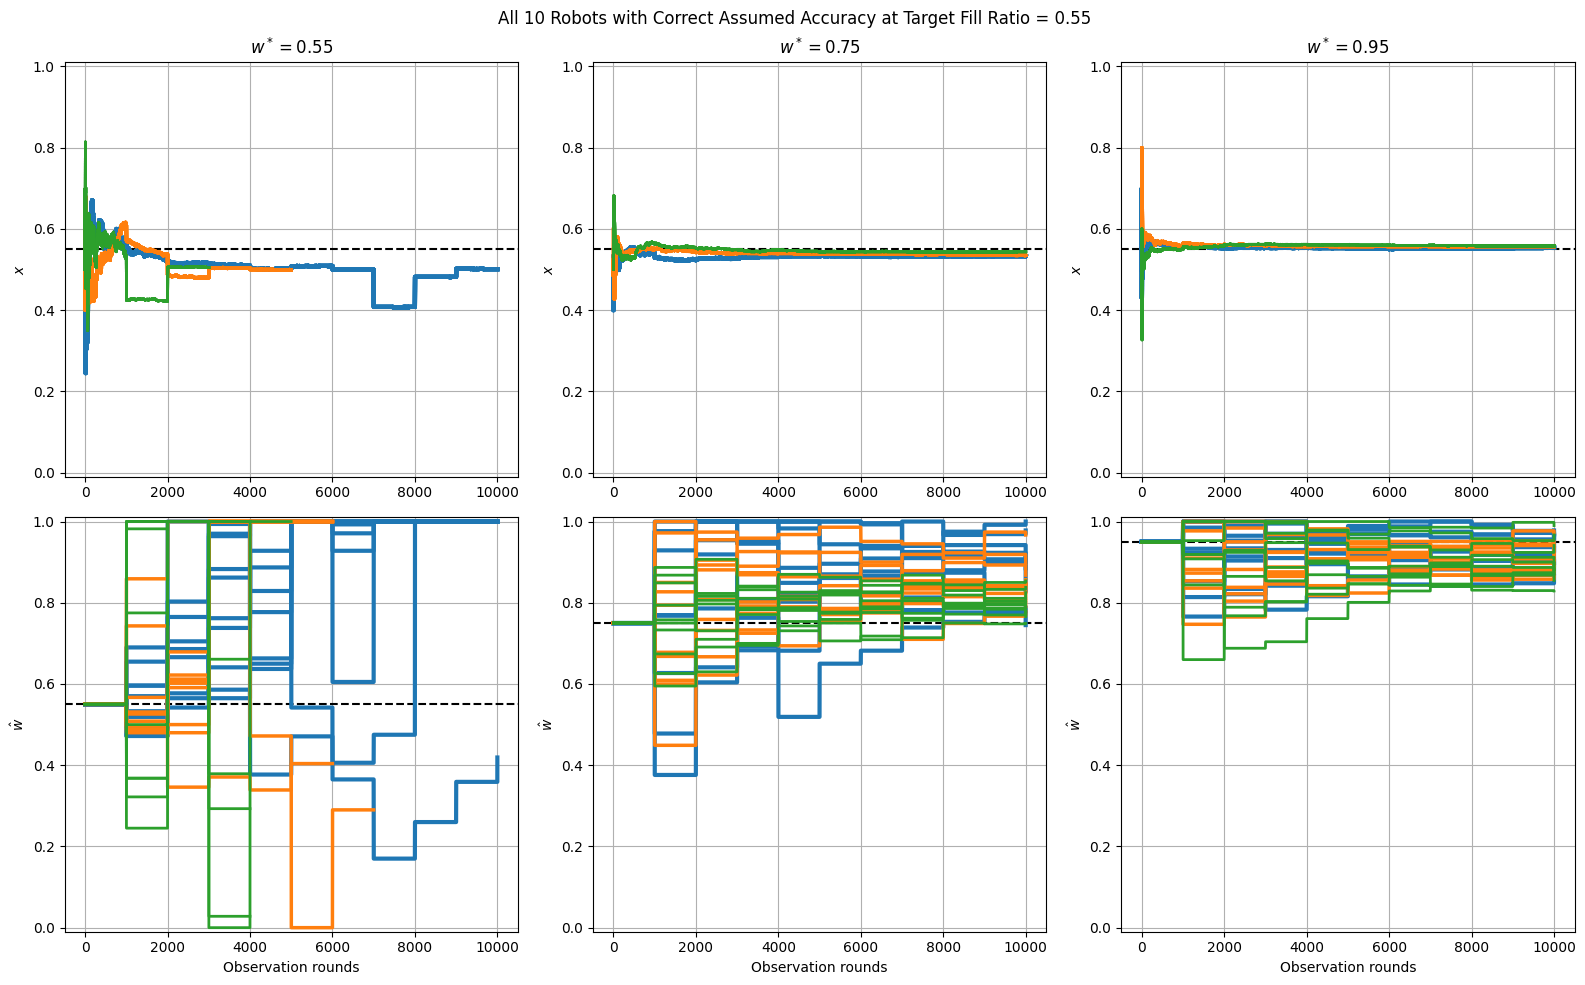

In [4]:
plot_data(case1_correct_tfr550_json_data, 0.55)

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False




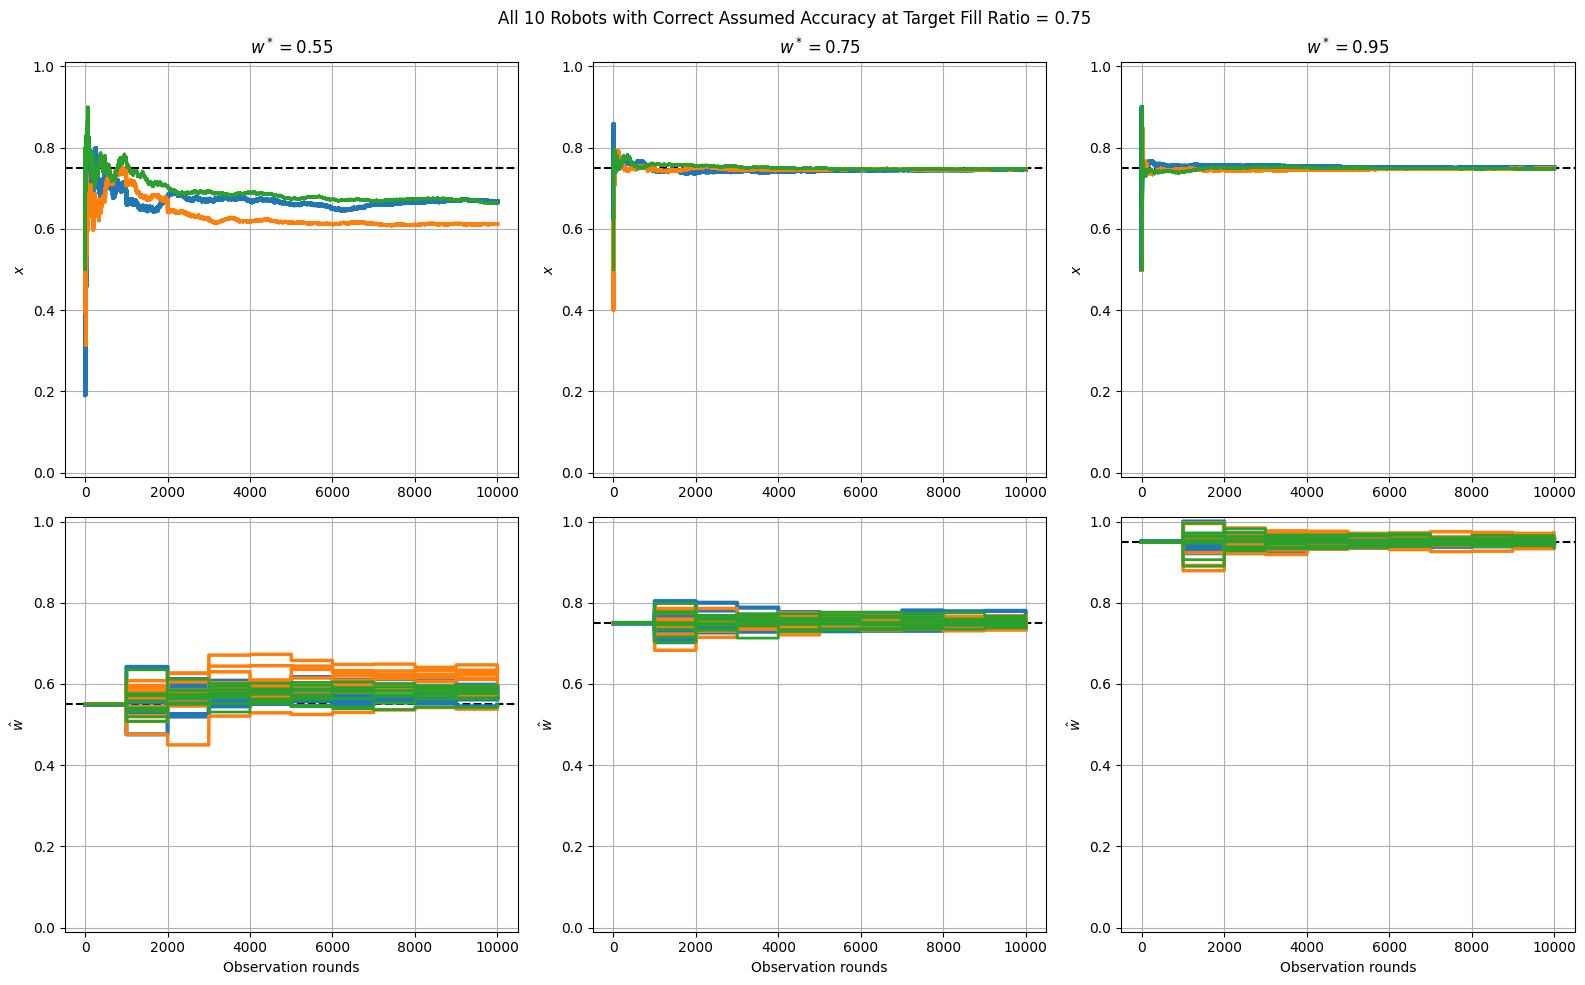

In [5]:
plot_data(case1_correct_tfr750_json_data, 0.75)

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False




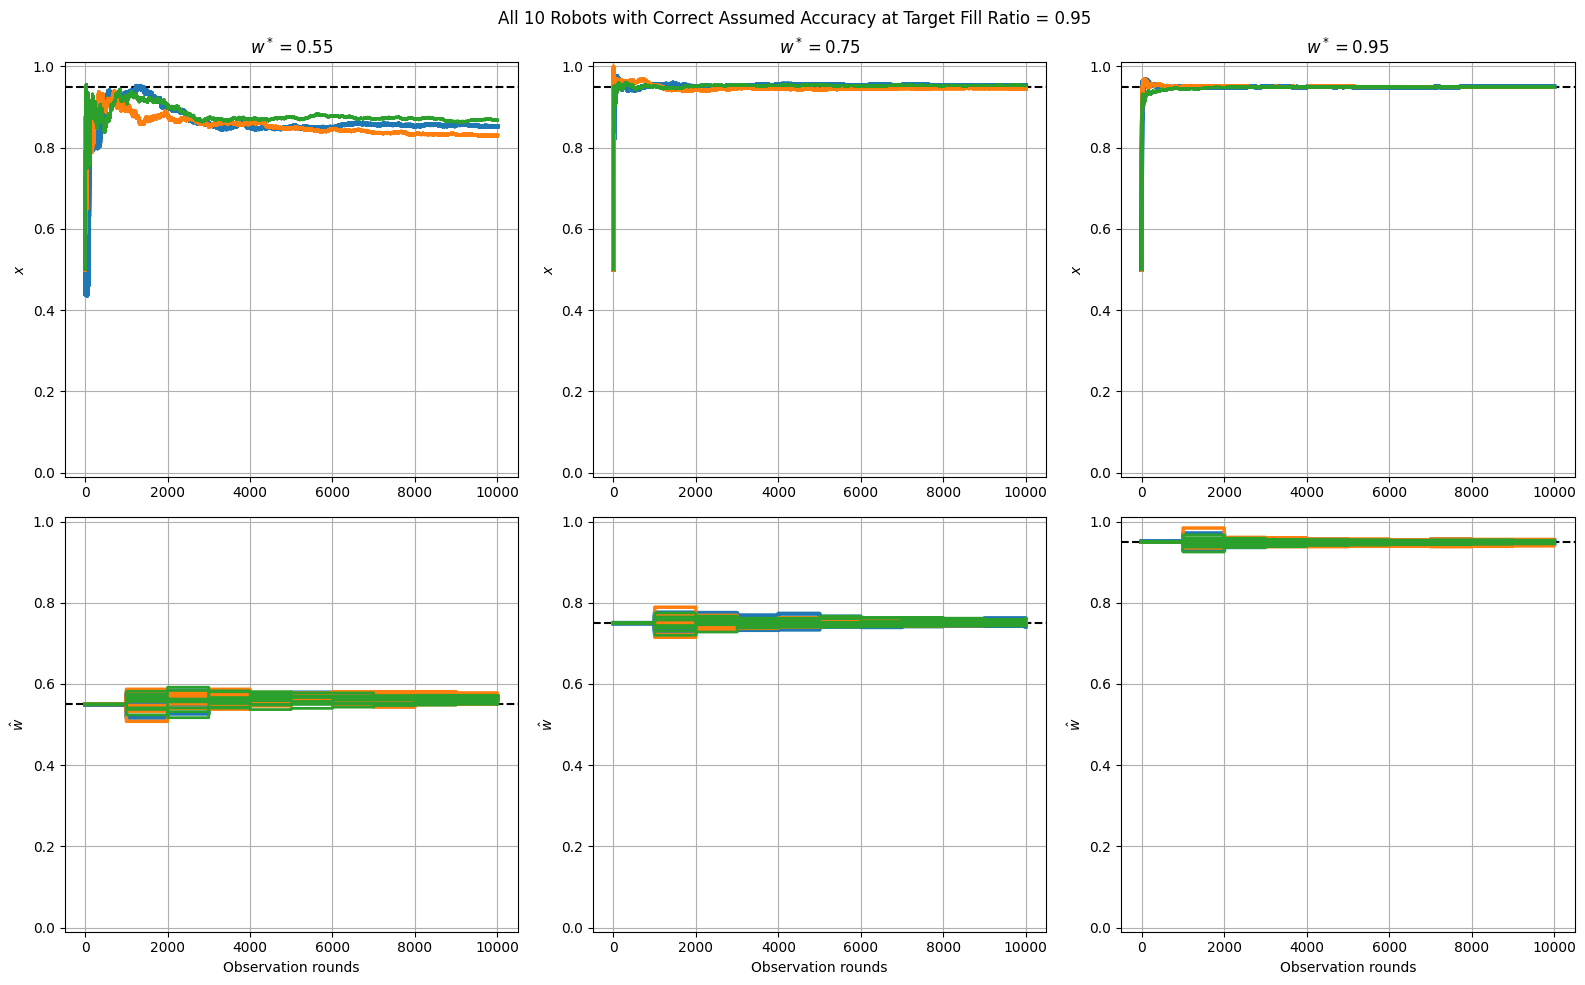

In [6]:
plot_data(case1_correct_tfr950_json_data, 0.95)

## Case 2: Sensor Filter Period = 2500 Observation Rounds

Robots update their sensor accuracies once every 2500 observation rounds.

In [7]:
# Correct assumed accuracy paths
case2_tfr550_paths = [
    "../data/040924_164503_t3_s10000_tfr550_flw10-0-10_flwb550_flww550_corb550_corw550_commsp10_filtp2500",
    "../data/040924_164654_t3_s10000_tfr550_flw10-0-10_flwb750_flww750_corb750_corw750_commsp10_filtp2500",
    "../data/040924_164846_t3_s10000_tfr550_flw10-0-10_flwb950_flww950_corb950_corw950_commsp10_filtp2500"
]

case2_tfr750_paths = [
    "../data/040924_164541_t3_s10000_tfr750_flw10-0-10_flwb550_flww550_corb550_corw550_commsp10_filtp2500",
    "../data/040924_164732_t3_s10000_tfr750_flw10-0-10_flwb750_flww750_corb750_corw750_commsp10_filtp2500",
    "../data/040924_164923_t3_s10000_tfr750_flw10-0-10_flwb950_flww950_corb950_corw950_commsp10_filtp2500"
]

case2_tfr950_paths = [
    "../data/040924_164618_t3_s10000_tfr950_flw10-0-10_flwb550_flww550_corb550_corw550_commsp10_filtp2500",
    "../data/040924_164809_t3_s10000_tfr950_flw10-0-10_flwb750_flww750_corb750_corw750_commsp10_filtp2500",
    "../data/040924_164958_t3_s10000_tfr950_flw10-0-10_flwb950_flww950_corb950_corw950_commsp10_filtp2500"
]

# Load data
case2_correct_tfr550_json_data = [sdvm.StaticDegradationJsonData(p) for p in case2_tfr550_paths]
case2_correct_tfr750_json_data = [sdvm.StaticDegradationJsonData(p) for p in case2_tfr750_paths]
case2_correct_tfr950_json_data = [sdvm.StaticDegradationJsonData(p) for p in case2_tfr950_paths]

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 2500
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 2500
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 2500
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False




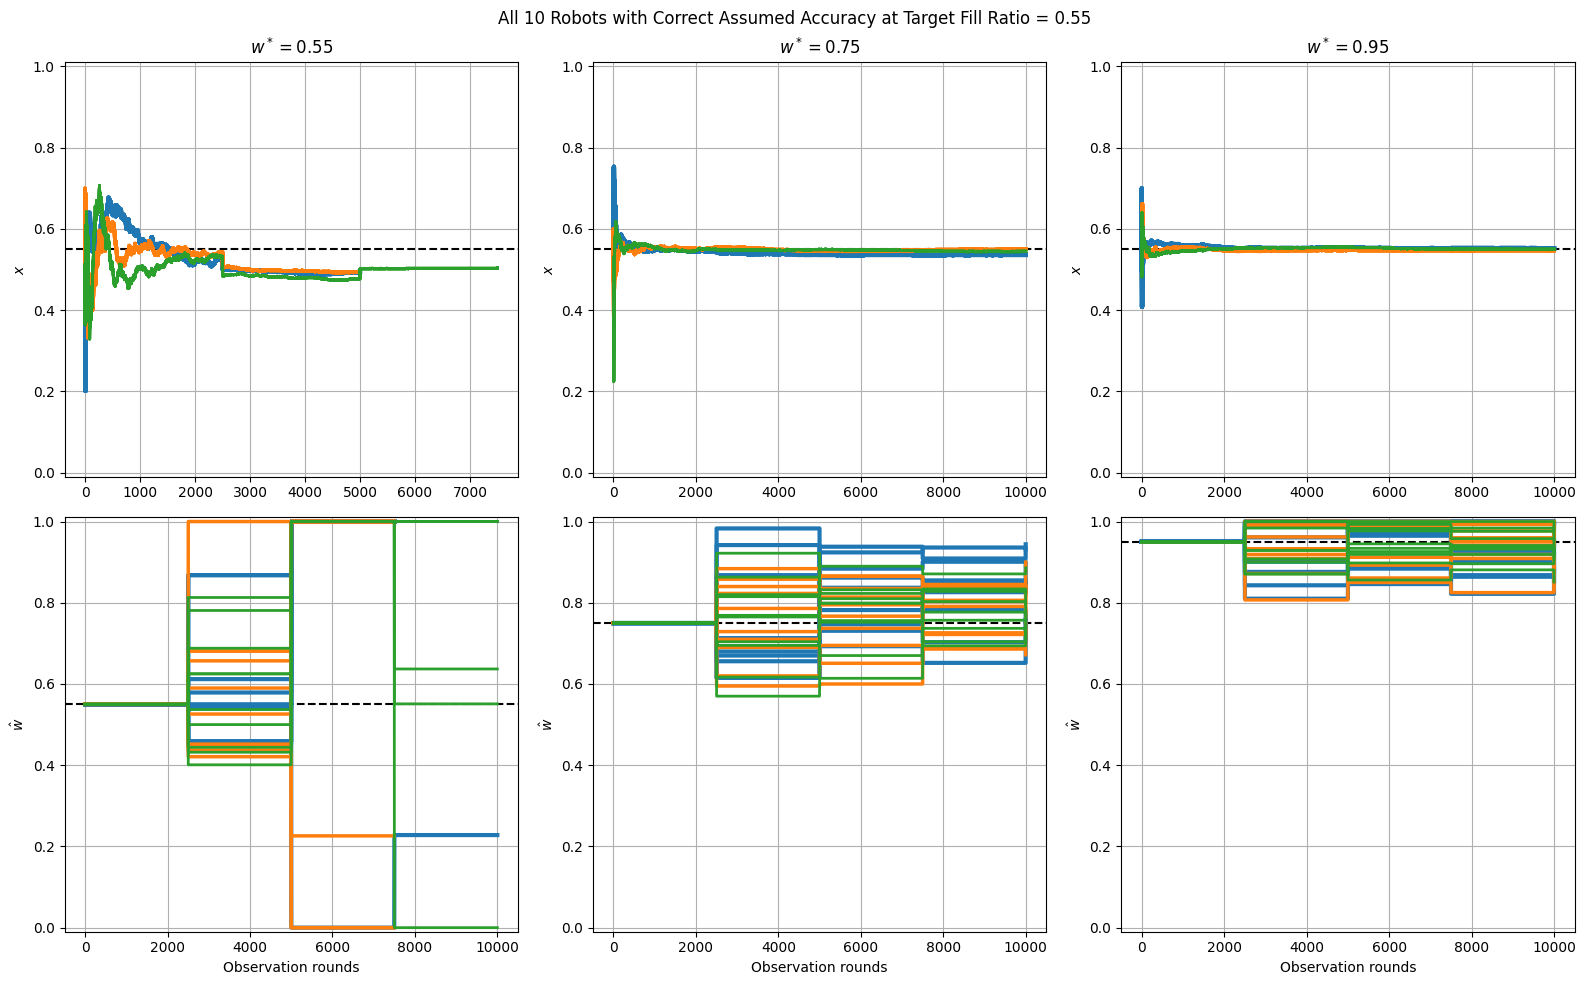

In [8]:
plot_data(case2_correct_tfr550_json_data, 0.55)

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 2500
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 2500
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 2500
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False




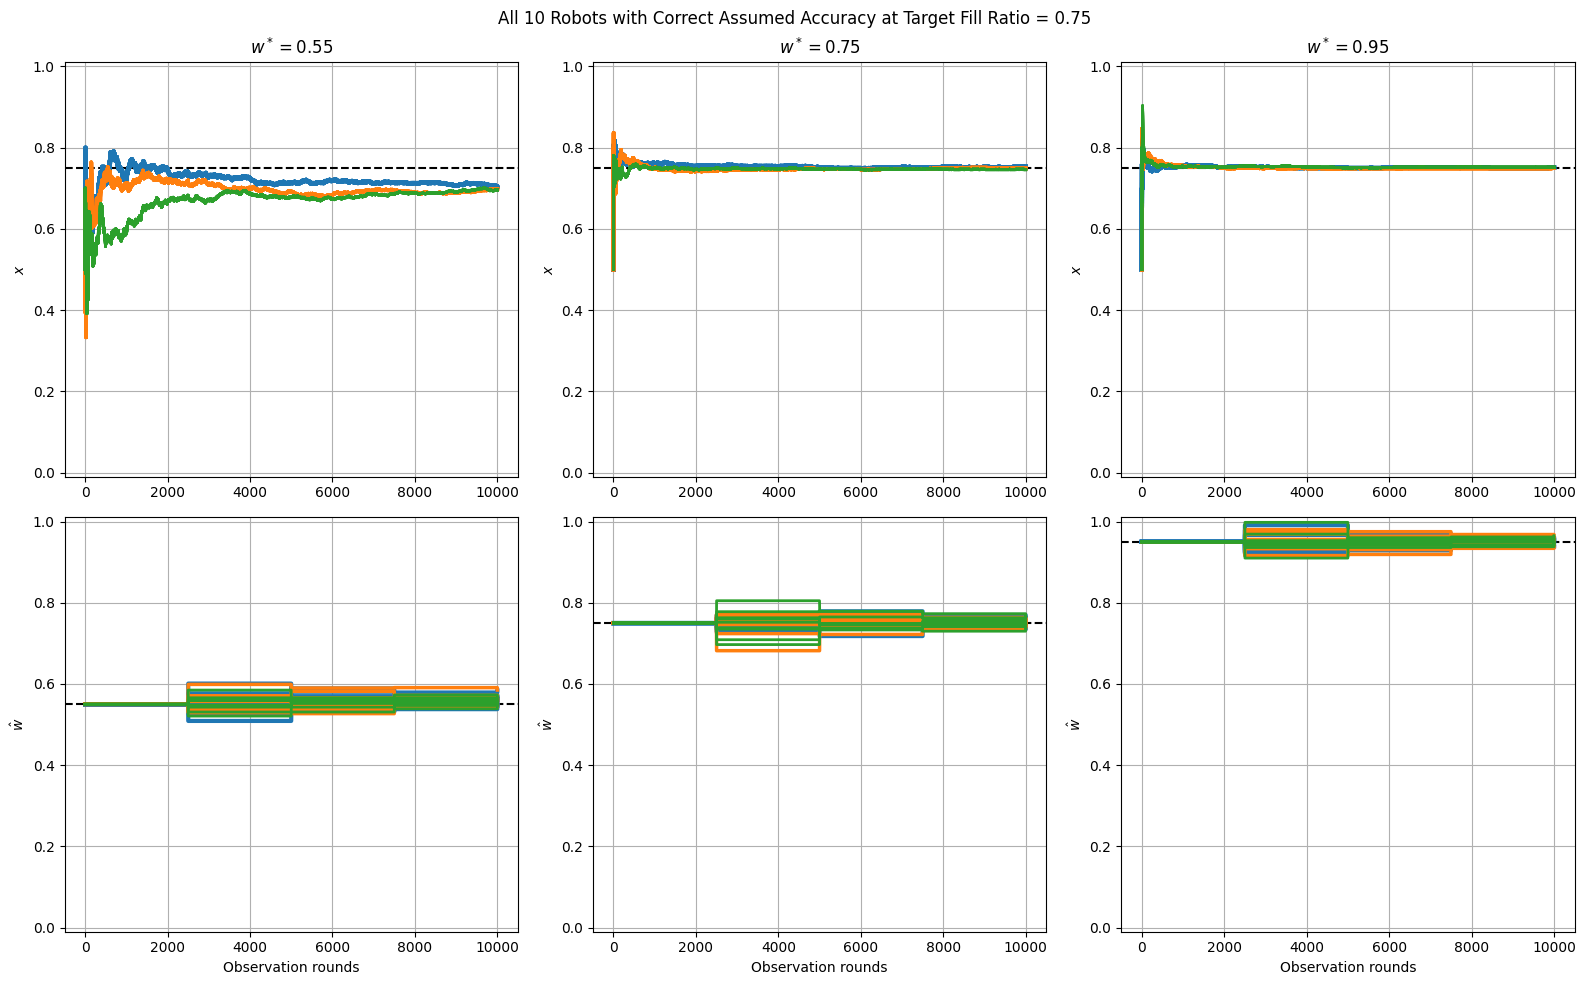

In [9]:
plot_data(case2_correct_tfr750_json_data, 0.75)

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 2500
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 2500
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 2500
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False




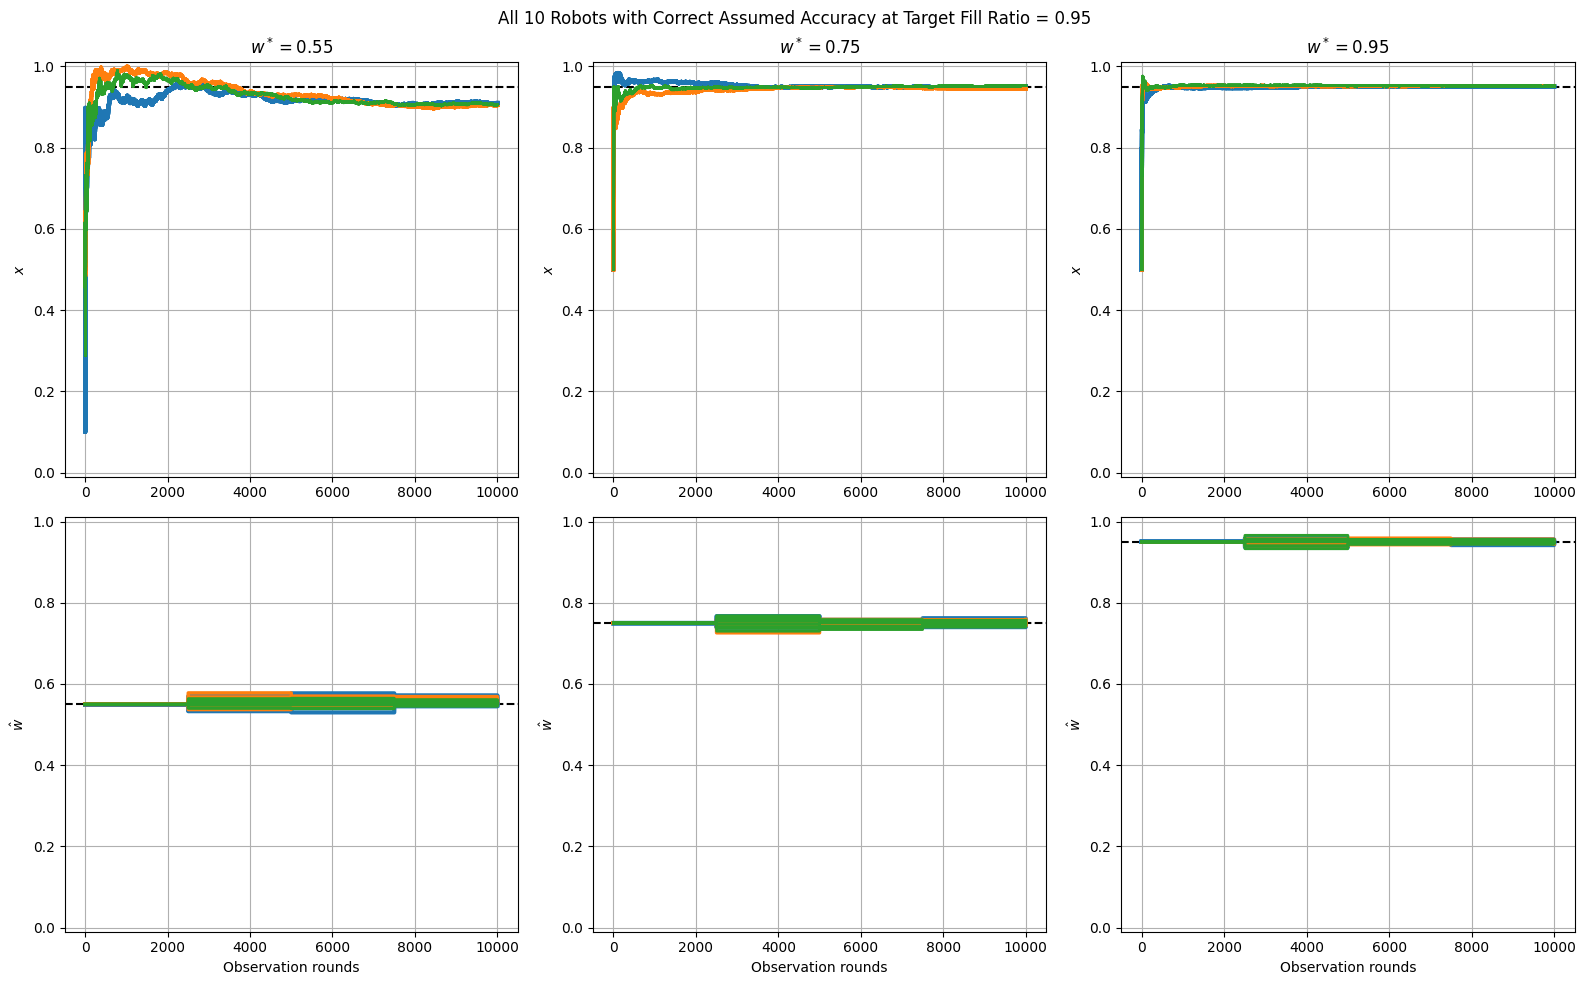

In [10]:
plot_data(case2_correct_tfr950_json_data, 0.95)

## Case 3: Sensor Filter Period = 5000 Observation Rounds

Robots update their sensor accuracies once every 5000 observation rounds.

In [11]:
case3_tfr550_paths = [
    "../data/040924_171559_t3_s10000_tfr550_flw10-0-10_flwb550_flww550_corb550_corw550_commsp10_filtp5000",
    "../data/040924_171750_t3_s10000_tfr550_flw10-0-10_flwb750_flww750_corb750_corw750_commsp10_filtp5000",
    "../data/040924_171938_t3_s10000_tfr550_flw10-0-10_flwb950_flww950_corb950_corw950_commsp10_filtp5000"
]

case3_tfr750_paths = [
    "../data/040924_171637_t3_s10000_tfr750_flw10-0-10_flwb550_flww550_corb550_corw550_commsp10_filtp5000",
    "../data/040924_171826_t3_s10000_tfr750_flw10-0-10_flwb750_flww750_corb750_corw750_commsp10_filtp5000",
    "../data/040924_172014_t3_s10000_tfr750_flw10-0-10_flwb950_flww950_corb950_corw950_commsp10_filtp5000"
]

case3_tfr950_paths = [
    "../data/040924_171714_t3_s10000_tfr950_flw10-0-10_flwb550_flww550_corb550_corw550_commsp10_filtp5000",
    "../data/040924_171902_t3_s10000_tfr950_flw10-0-10_flwb750_flww750_corb750_corw750_commsp10_filtp5000",
    "../data/040924_172050_t3_s10000_tfr950_flw10-0-10_flwb950_flww950_corb950_corw950_commsp10_filtp5000"
]

# Load data
case3_correct_tfr550_json_data = [sdvm.StaticDegradationJsonData(p) for p in case3_tfr550_paths]
case3_correct_tfr750_json_data = [sdvm.StaticDegradationJsonData(p) for p in case3_tfr750_paths]
case3_correct_tfr950_json_data = [sdvm.StaticDegradationJsonData(p) for p in case3_tfr950_paths]

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 5000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 5000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 5000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False




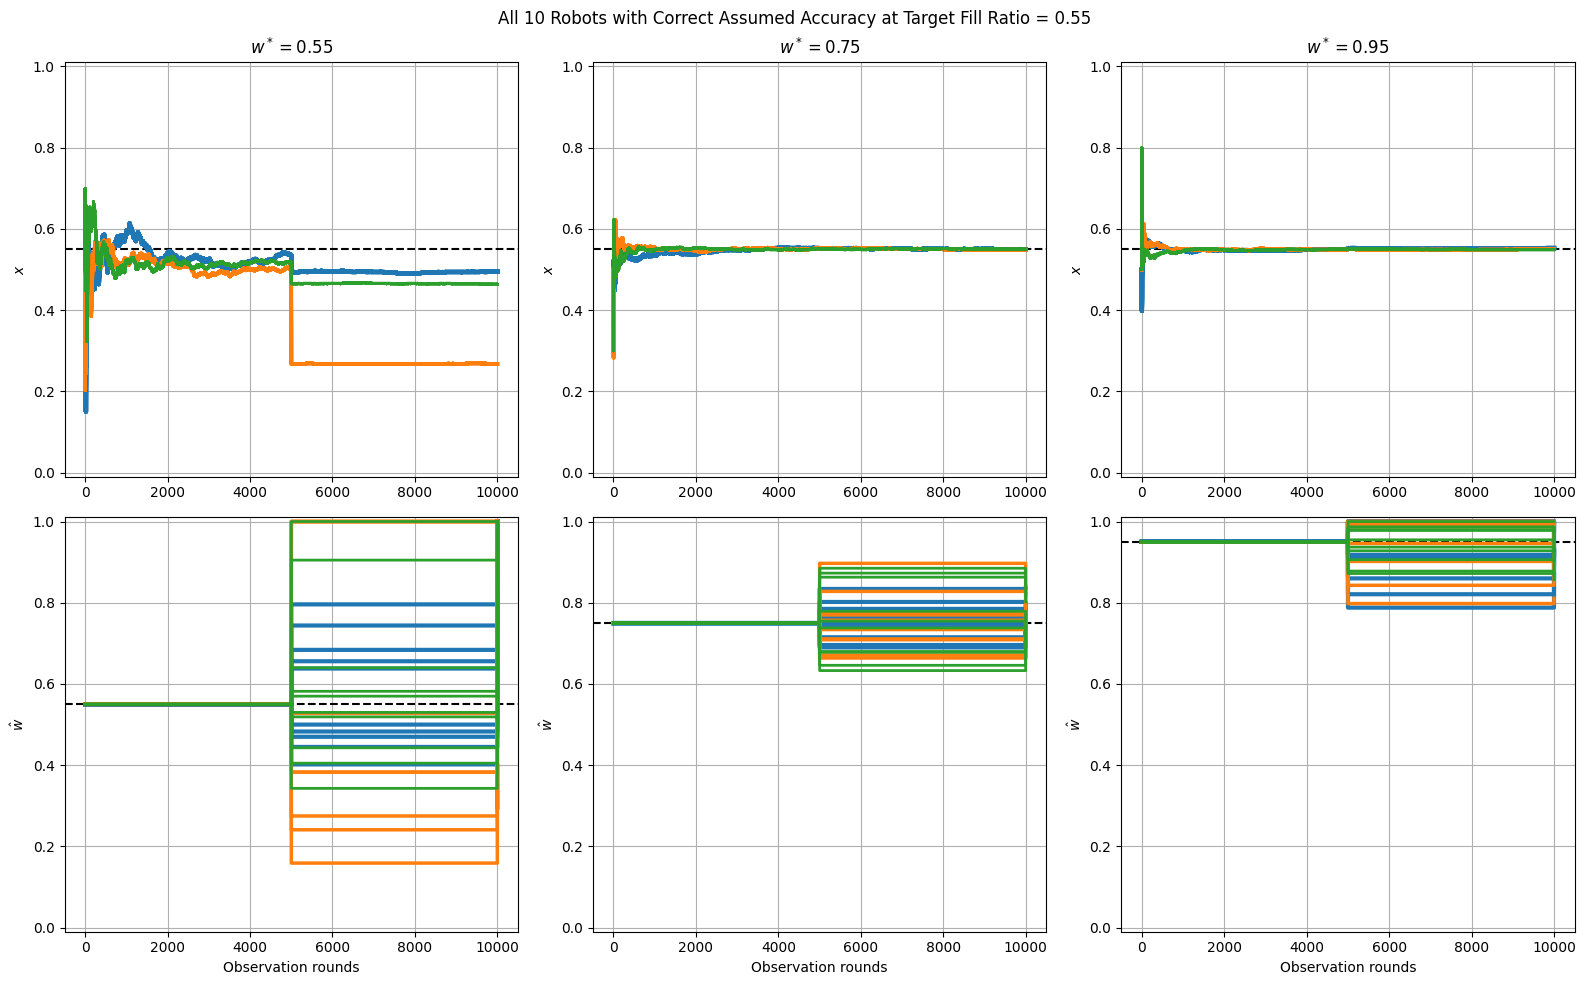

In [12]:
plot_data(case3_correct_tfr550_json_data, 0.55)

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 5000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 5000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 5000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False




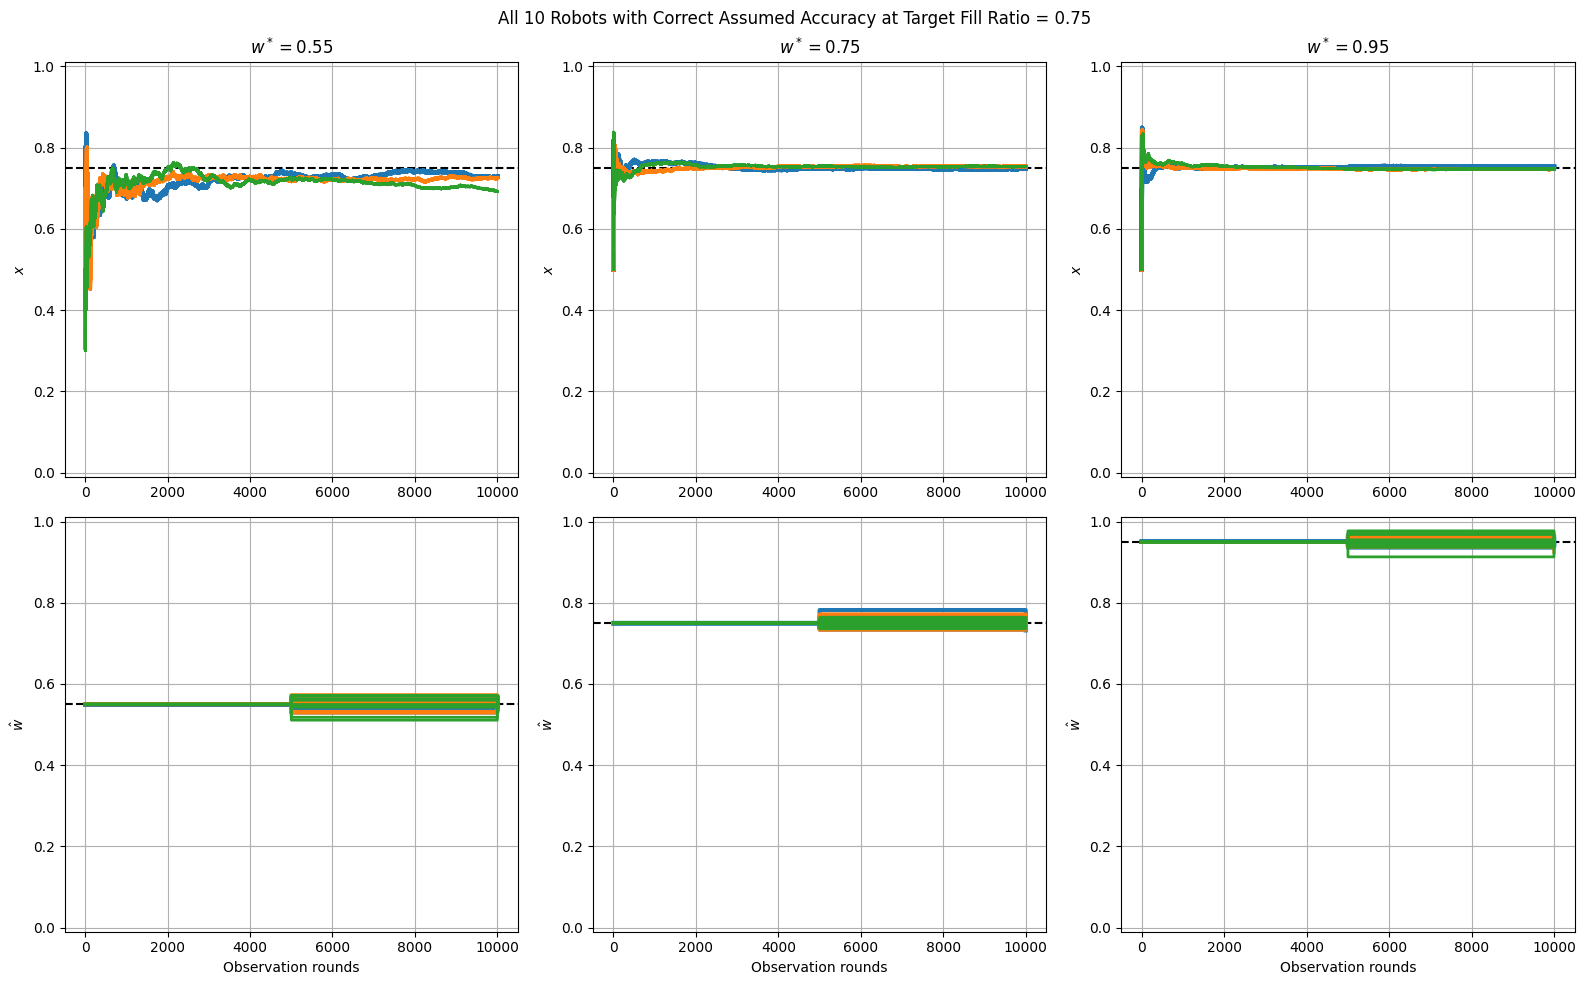

In [13]:
plot_data(case3_correct_tfr750_json_data, 0.75)

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 5000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 5000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 5000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False




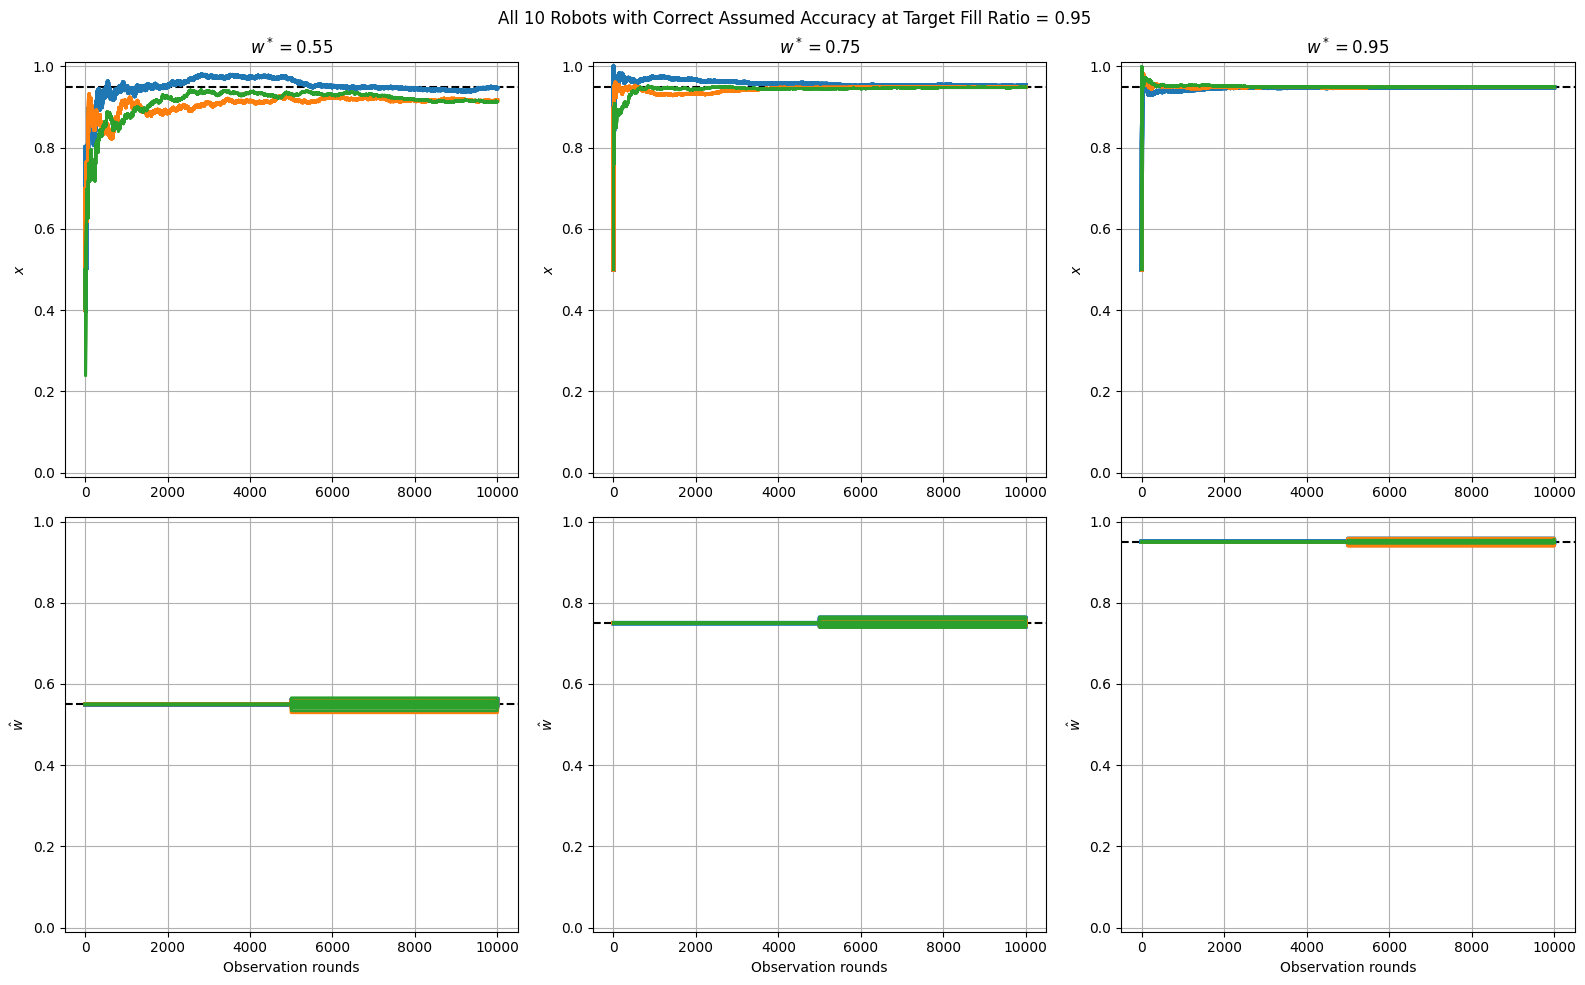

In [14]:
plot_data(case3_correct_tfr950_json_data, 0.95)

## Case 4: Sensor Filter Period = 10000 Observation Rounds

Robots update their sensor accuracies once every 10000 observation rounds. Essentially the robots do not have an updated sensor accuracy to perform collective estimation.

In [15]:
case4_tfr550_paths = [
    "../data/041024_104855_t3_s10000_tfr550_flw10-0-10_flwb550_flww550_corb550_corw550_commsp10_filtp10000",
    "../data/041024_105044_t3_s10000_tfr550_flw10-0-10_flwb750_flww750_corb750_corw750_commsp10_filtp10000",
    "../data/041024_105232_t3_s10000_tfr550_flw10-0-10_flwb950_flww950_corb950_corw950_commsp10_filtp10000"
]

case4_tfr750_paths = [
    "../data/041024_104931_t3_s10000_tfr750_flw10-0-10_flwb550_flww550_corb550_corw550_commsp10_filtp10000",
    "../data/041024_105122_t3_s10000_tfr750_flw10-0-10_flwb750_flww750_corb750_corw750_commsp10_filtp10000",
    "../data/041024_105304_t3_s10000_tfr750_flw10-0-10_flwb950_flww950_corb950_corw950_commsp10_filtp10000"
]

case4_tfr950_paths = [
    "../data/041024_105007_t3_s10000_tfr950_flw10-0-10_flwb550_flww550_corb550_corw550_commsp10_filtp10000",
    "../data/041024_105158_t3_s10000_tfr950_flw10-0-10_flwb750_flww750_corb750_corw750_commsp10_filtp10000",
    "../data/041024_105341_t3_s10000_tfr950_flw10-0-10_flwb950_flww950_corb950_corw950_commsp10_filtp10000"
]

# Load data
case4_correct_tfr550_json_data = [sdvm.StaticDegradationJsonData(p) for p in case4_tfr550_paths]
case4_correct_tfr750_json_data = [sdvm.StaticDegradationJsonData(p) for p in case4_tfr750_paths]
case4_correct_tfr950_json_data = [sdvm.StaticDegradationJsonData(p) for p in case4_tfr950_paths]

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 10000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 10000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 10000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False




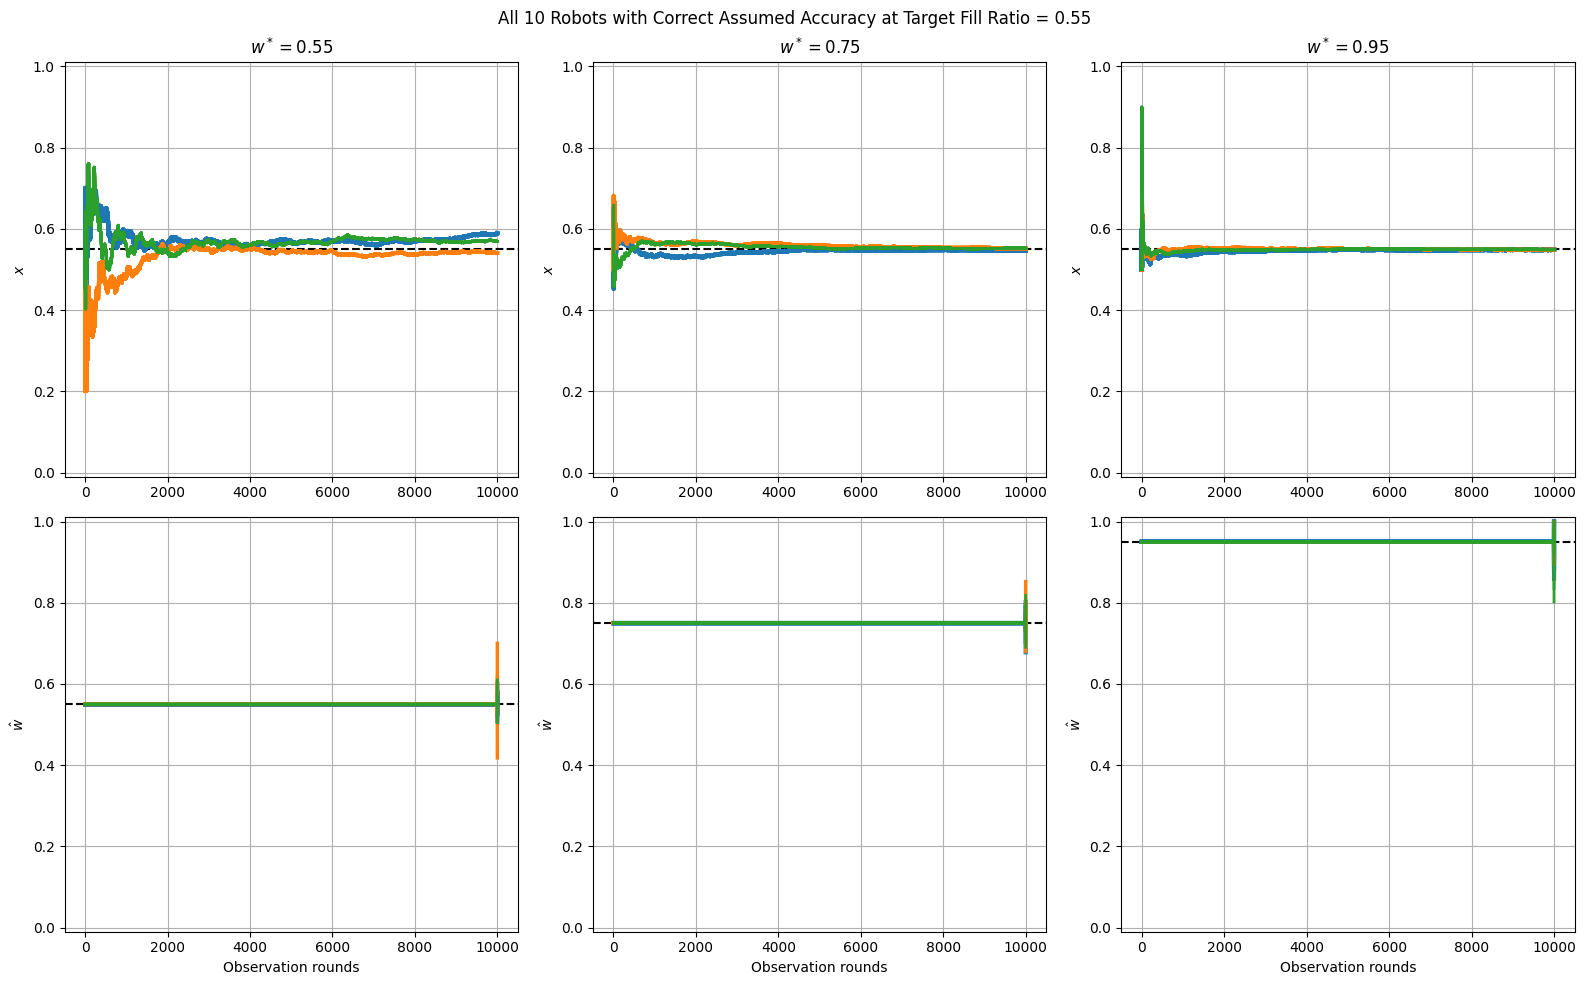

In [16]:
plot_data(case4_correct_tfr550_json_data, 0.55)

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 10000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 10000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 10000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False




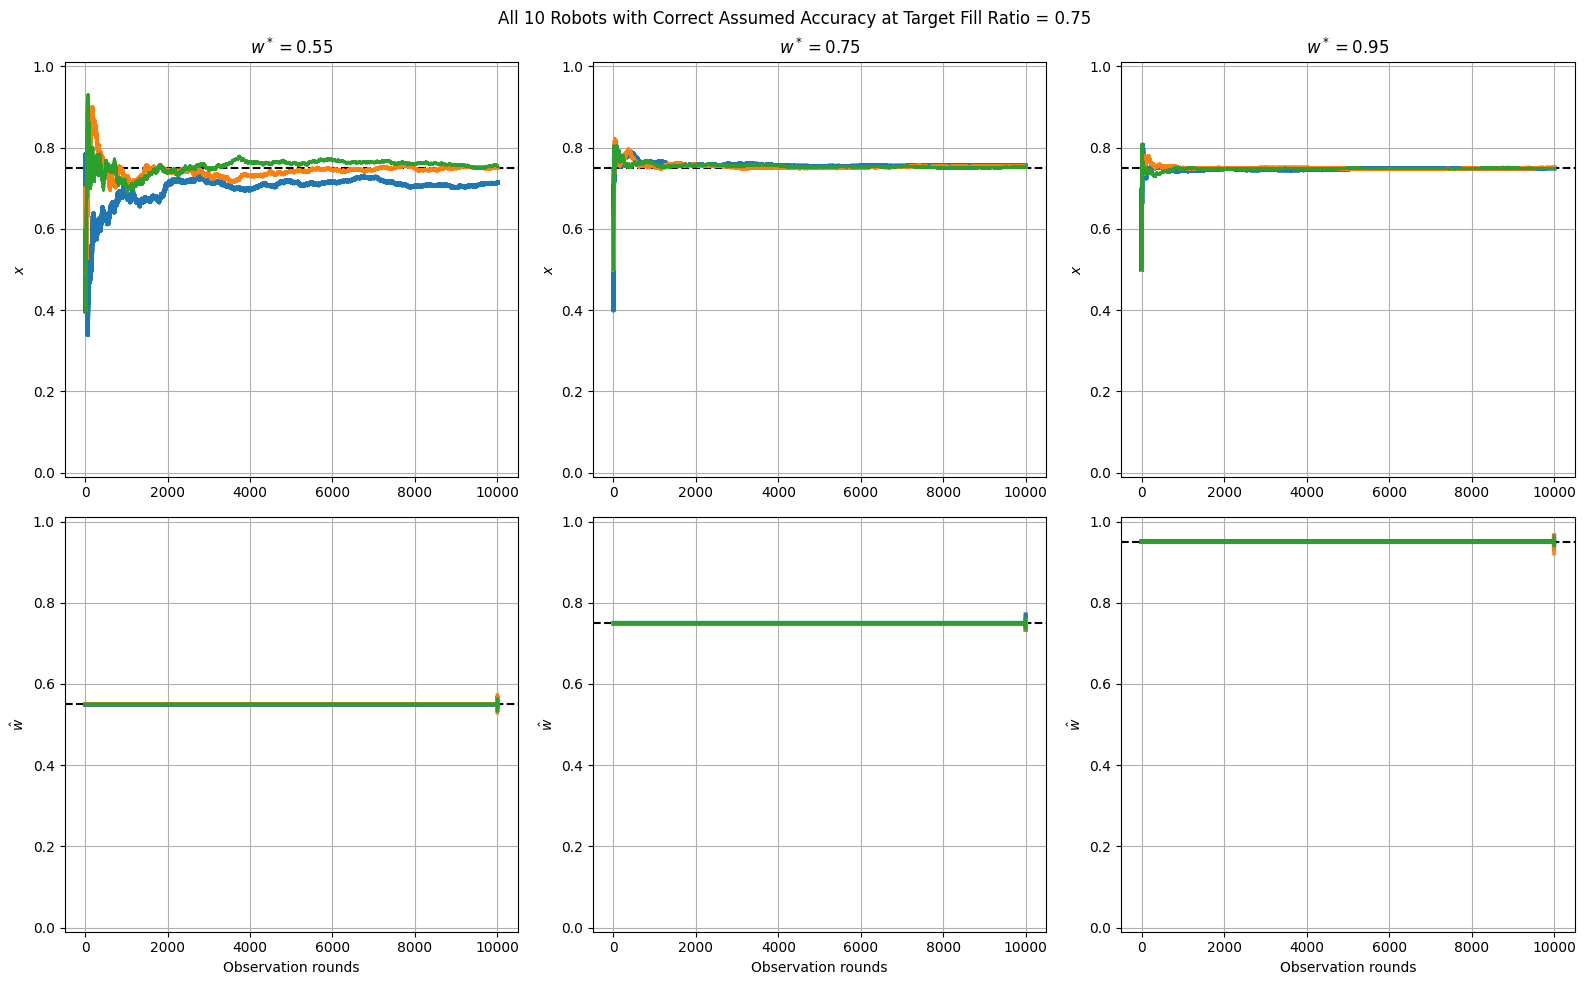

In [17]:
plot_data(case4_correct_tfr750_json_data, 0.75)

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 10000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 10000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 10000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False




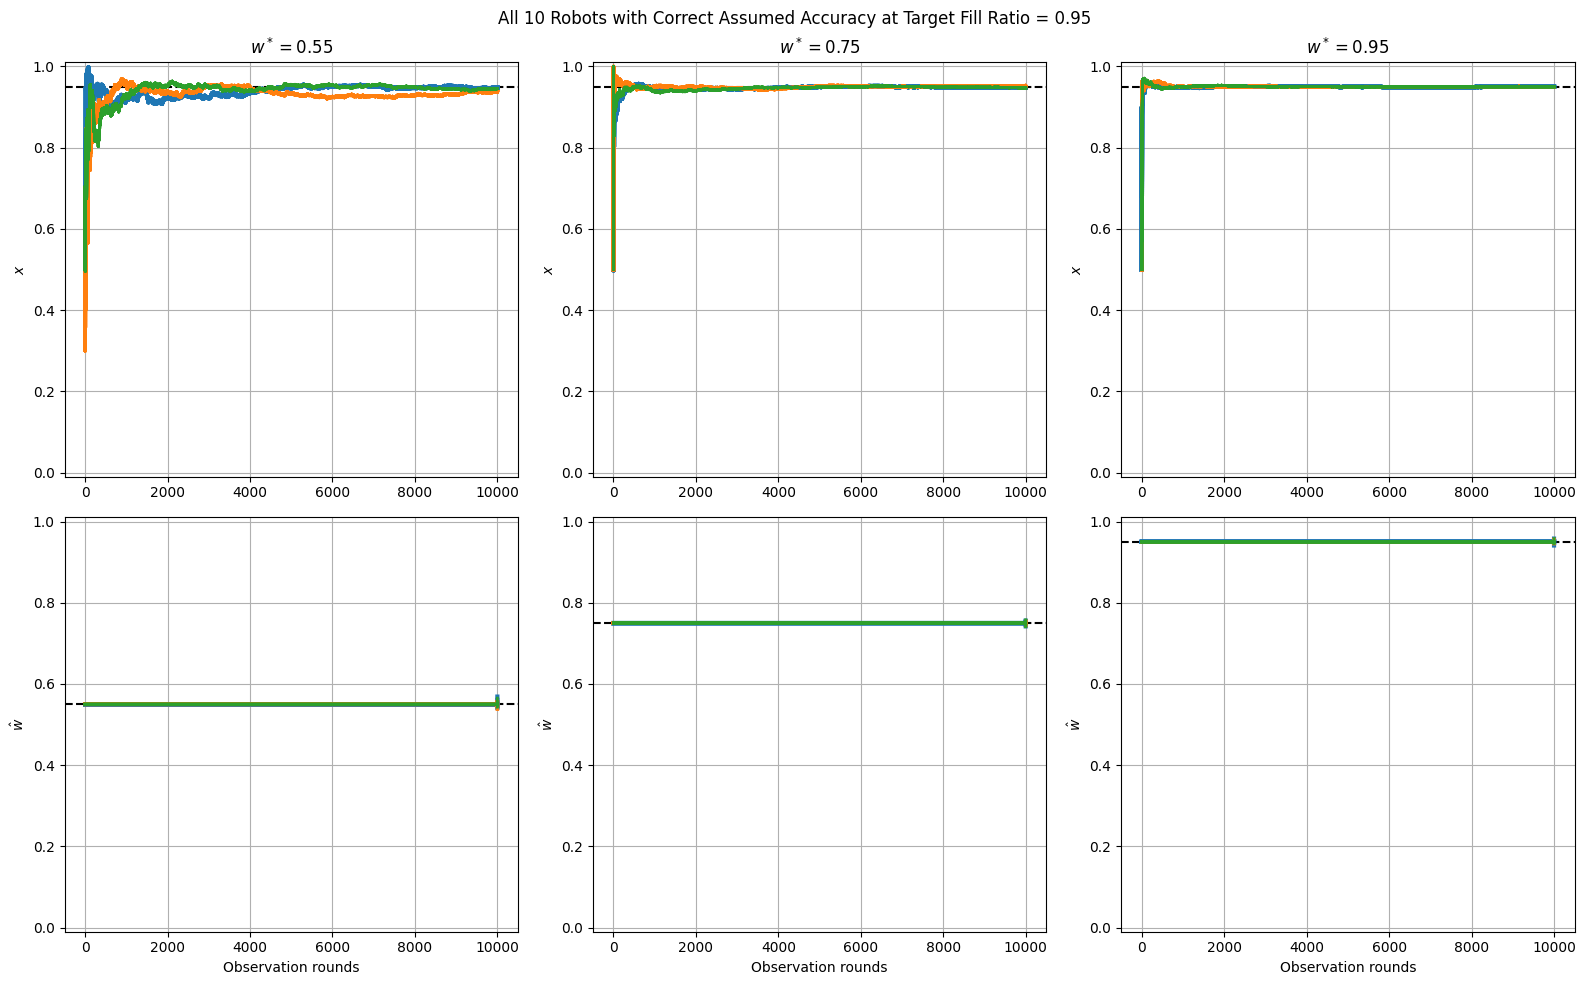

In [18]:
plot_data(case4_correct_tfr950_json_data, 0.95)